In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("airbnb.csv")

### 1. Get the big picture of what the data is about. 

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We can see from the header data above ,the data describes the listing activity and metrics ,includes all information about to find out more about host ,geographical availability ,necessary metrics to make prediction and draw conclution

### 2. Inspect the properties of the data in each column (type,missing value,etc)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 3. Show the amount of data ,mean ,median ,and std

In [6]:
df.shape

(48895, 16)

In [7]:
df.size

782320

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 4. How much is the min and max price ? 

In [9]:
min_value ,max_value= df['price'].agg(['min','max'])
print("Minimum price is :",min_value)
print()
print("Maximum price is :",max_value)

Minimum price is : 0

Maximum price is : 10000


### 5. Get rid of the missing value :

#### a. Drop columns which has missing value that cannot be filled with any logical value (like name ,host_id ,etc)

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Name and host_name has missing value that cannot be filled with any logical value 

In [11]:
df_baru = df.iloc[:,[0,2,4,5,6,7,8,9,10,11,12,13,14,15]]
df_baru

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### b. Fill the missing value in last_review with the most common date

In [12]:
common_date = df_baru.iloc[:,10].mode()
common_date

0    2019-06-23
dtype: object

the most common date of last_review is 2019-06-23 ,so we'll fill the missing values with that date

In [13]:
#pd.set_option("display.max_rows",None,"display.max_columns",None)
df_baru.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
df_baru.tail()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [15]:
df_baru.iloc[:,10]=df_baru.iloc[:,10].fillna(df_baru.iloc[:,10].mode()[0])

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [16]:
df_baru.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
df_baru.tail()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,NaN,6,2
48894,36487245,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,2019-06-23,NaN,1,23


#### c. Fill the missing value in reviews_per_month with the mean 

In [18]:
df_baru.iloc[:,11] = df_baru.iloc[:,11].fillna(df_baru.iloc[:,11].mean())

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [19]:
df_baru.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [20]:
df_baru.tail()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2
48894,36487245,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,2019-06-23,1.373221,1,23


### 6. Make category based on the price : Cheap ,Medium ,and Expensive 

    < 1000        = Cheap
    1000 - 3000   = Medium
    > 3000        = Expensive

In [21]:
df_baru['category'] = np.where(df_baru['price']>3000,'Expensive',np.where(df_baru['price']>=1000,"Medium","Cheap"))

<ipython-input-21-c184f122ceac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['category'] = np.where(df_baru['price']>3000,'Expensive',np.where(df_baru['price']>=1000,"Medium","Cheap"))


Checking for medium and expensive price 

In [22]:
df_baru[df_baru['category'].isin(['Expensive','Medium'])]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
496,174966,836168,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.330000,11,0,Medium
762,273190,605463,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.310000,4,297,Medium
946,363673,256239,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,2019-06-23,1.373221,1,365,Medium
1105,468613,2325861,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,2019-06-23,1.373221,1,0,Medium
1414,634353,836168,Manhattan,Upper West Side,40.77428,-73.98594,Entire home/apt,1000,30,44,2015-09-28,0.530000,11,364,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48282,36177241,23732730,Bronx,City Island,40.84443,-73.78497,Entire home/apt,1000,1,0,2019-06-23,1.373221,4,90,Medium
48304,36189195,270214015,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,2019-06-23,1.373221,1,222,Medium
48305,36189257,272166348,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,2019-06-23,1.373221,1,270,Medium
48523,36308562,217732163,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,2019-06-23,1.373221,1,349,Medium


### 7.Filter all data which has last_review in > 2019

In [23]:
df_baru['last_review_year']=pd.DatetimeIndex(df_baru['last_review']).year
df_baru

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category,last_review_year
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Cheap,2018
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Cheap,2019
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Cheap,2019
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Cheap,2019
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Cheap,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Cheap,2019
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap,2019
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Cheap,2019
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap,2019


Filtering for last_review = 2019 :

In [24]:
df_baru["last_review_year"]=pd.to_numeric(df_baru["last_review_year"])
df_filt = df_baru.loc[df_baru["last_review_year"]== 2019]
df_filt

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category,last_review_year
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Cheap,2019
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Cheap,2019
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Cheap,2019
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Cheap,2019
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,Cheap,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Cheap,2019
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap,2019
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Cheap,2019
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap,2019


### 8. Visualize the price to compare the price of available rooms

In [25]:
price = df_filt['price']

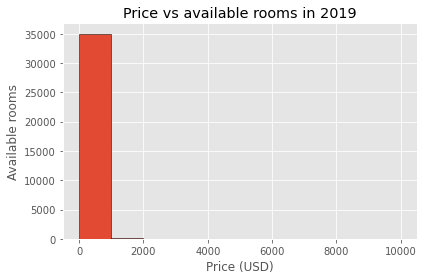

In [26]:
plt.style.use('ggplot')
plt.hist(price,edgecolor ='k')

plt.title("Price vs available rooms in 2019")
plt.xlabel("Price (USD)")
plt.ylabel("Available rooms")

plt.tight_layout()
plt.savefig('hist.png')
plt.show()

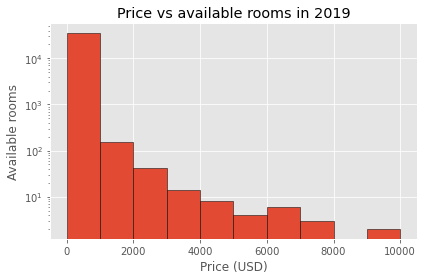

In [27]:
plt.style.use('ggplot')
plt.hist(price,edgecolor ='k' ,log = True)

plt.title("Price vs available rooms in 2019")
plt.xlabel("Price (USD)")
plt.ylabel("Available rooms")

plt.tight_layout()
plt.savefig('hist_log.png')
plt.show()

### 9. Neighbourhood vs  number of reviews

In [28]:
neighbourhood = np.array(df_filt['neighbourhood'])
neighbourhood_group = np.array(df_filt['neighbourhood_group'])
number_of_reviews = np.array(df_filt['number_of_reviews'])
print(neighbourhood)
print(neighbourhood_group)
print(number_of_reviews)

['Midtown' 'Harlem' 'Clinton Hill' ... 'Harlem' "Hell's Kitchen"
 "Hell's Kitchen"]
['Manhattan' 'Manhattan' 'Brooklyn' ... 'Manhattan' 'Manhattan'
 'Manhattan']
[ 45   0 270 ...   0   0   0]


#### Based on Neighbourhood Group 

In [29]:
df_filt['neighbourhood_group'].value_counts()

Manhattan        15351
Brooklyn         14123
Queens            4548
Bronx              913
Staten Island      326
Name: neighbourhood_group, dtype: int64

In [30]:
Manhattan_value = 0
Brooklyn_value = 0
Queens_value = 0
Bronx_value = 0
Staten_island_value = 0

for i in range(0,len(neighbourhood_group)):
    if neighbourhood_group[i] == 'Manhattan':
        Manhattan_value = Manhattan_value + number_of_reviews[i]
    elif neighbourhood_group[i] == 'Brooklyn':
        Brooklyn_value = Brooklyn_value + number_of_reviews[i]
    elif neighbourhood_group[i] == 'Queens':
        Queens_value = Queens_value + number_of_reviews[i]
    elif neighbourhood_group[i] == 'Bronx':
        Bronx_value = Bronx_value + number_of_reviews[i]
    elif neighbourhood_group[i] == 'Staten Island':
        Staten_island_value = Staten_island_value + number_of_reviews[i]

<function matplotlib.pyplot.show(close=None, block=None)>

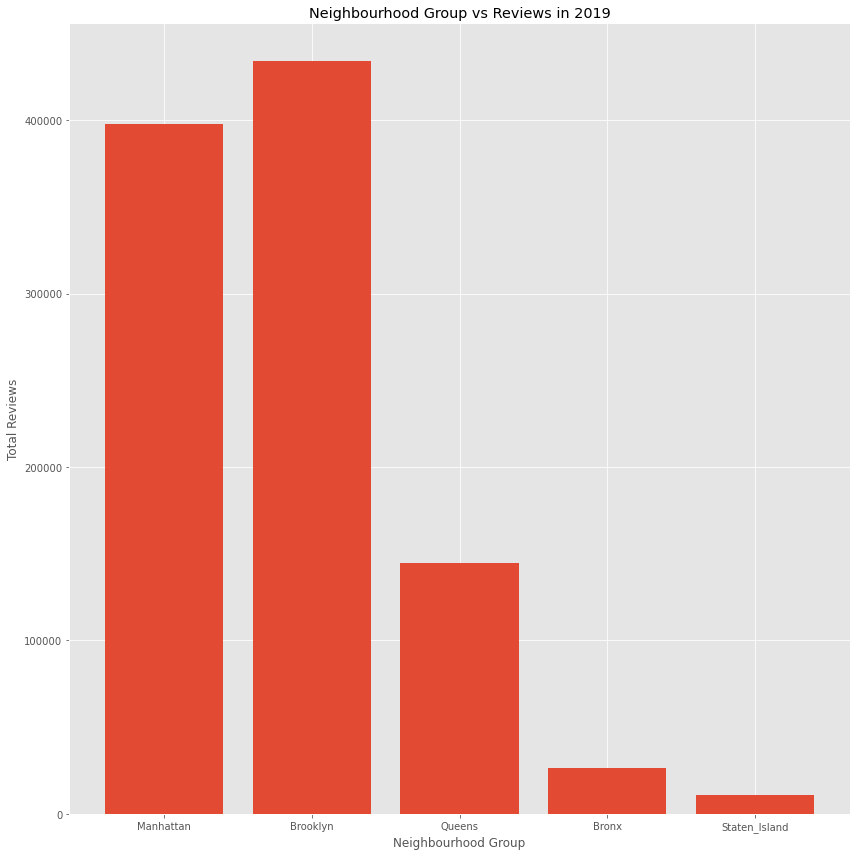

In [31]:
plt.figure(figsize=[12,12])
plt.bar(['Manhattan','Brooklyn','Queens','Bronx','Staten_Island'],[Manhattan_value,Brooklyn_value,Queens_value,Bronx_value,
                                                                   Staten_island_value])

plt.title("Neighbourhood Group vs Reviews in 2019")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Total Reviews")

plt.tight_layout()
plt.savefig('bar_neighbourhood_group.png')
plt.show

#### Based on Neighbourhood 

In [32]:
df_filt['neighbourhood'].value_counts()

Bedford-Stuyvesant    2782
Williamsburg          2610
Harlem                1887
Bushwick              1723
Hell's Kitchen        1545
                      ... 
Co-op City               1
West Farms               1
New Dorp                 1
Howland Hook             1
Richmondtown             1
Name: neighbourhood, Length: 220, dtype: int64

In [33]:
Manhattan_group = []
Brooklyn_group = []
Queens_group = [] 
Bronx_group = []
Staten_island_group = [] 

for i in range(0,len(neighbourhood_group)):
    if neighbourhood_group[i] == 'Manhattan':
        Manhattan_group.append([neighbourhood[i],number_of_reviews[i]])
    elif neighbourhood_group[i] == 'Brooklyn':
        Brooklyn_group.append([neighbourhood[i],number_of_reviews[i]])
    elif neighbourhood_group[i] == 'Queens':
        Queens_group.append([neighbourhood[i],number_of_reviews[i]])
    elif neighbourhood_group[i] == 'Bronx':
        Bronx_group.append([neighbourhood[i],number_of_reviews[i]])
    elif neighbourhood_group[i] == 'Staten Island':
        Staten_island_group.append([neighbourhood[i],number_of_reviews[i]])

In [34]:
# Parse each list component into 2 variables (neighbourhood & reviews)
Manhattan = []
reviews_1 = []
Brooklyn = []
reviews_2 = []
Queens = []
reviews_3 = []
Bronx = []
reviews_4 = []
Queens = []
Staten_Island = []
reviews_5 = []

for review1 in Manhattan_group:
    Manhattan.append(review1[0])
    reviews_1.append(review1[1])
for review2 in Brooklyn_group:
    Brooklyn.append(review2[0])
    reviews_2.append(review2[1])
for review3 in Queens_group:
    Queens.append(review3[0])
    reviews_3.append(review3[1])
for review4 in Bronx_group:
    Bronx.append(review4[0])
    reviews_4.append(review4[1])
for review5 in Staten_island_group:
    Staten_Island.append(review5[0])
    reviews_5.append(review5[1])

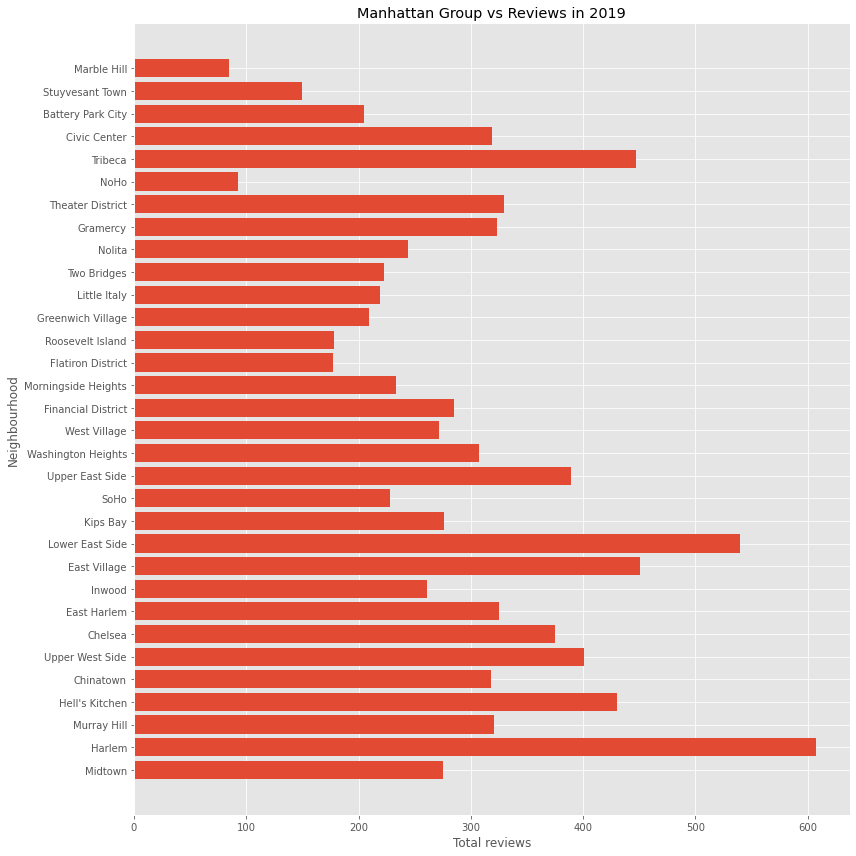

In [35]:
plt.figure(figsize=[12,12])
plt.barh(Manhattan,reviews_1)

plt.title("Manhattan Group vs Reviews in 2019")
plt.xlabel("Total reviews")
plt.ylabel("Neighbourhood")

plt.tight_layout()
plt.savefig('bar_Manhattan.png')
plt.show()

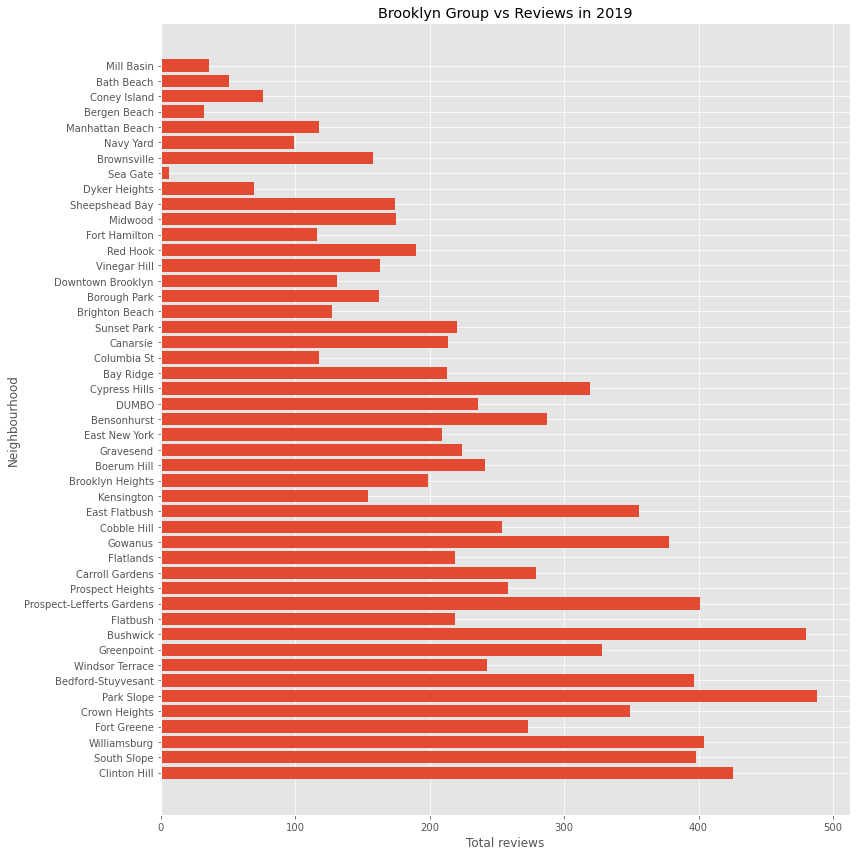

In [36]:
plt.figure(figsize=[12,12])
plt.barh(Brooklyn,reviews_2)

plt.title("Brooklyn Group vs Reviews in 2019")
plt.xlabel("Total reviews")
plt.ylabel("Neighbourhood")

plt.tight_layout()
plt.savefig('bar_Brooklyn.png')
plt.show()

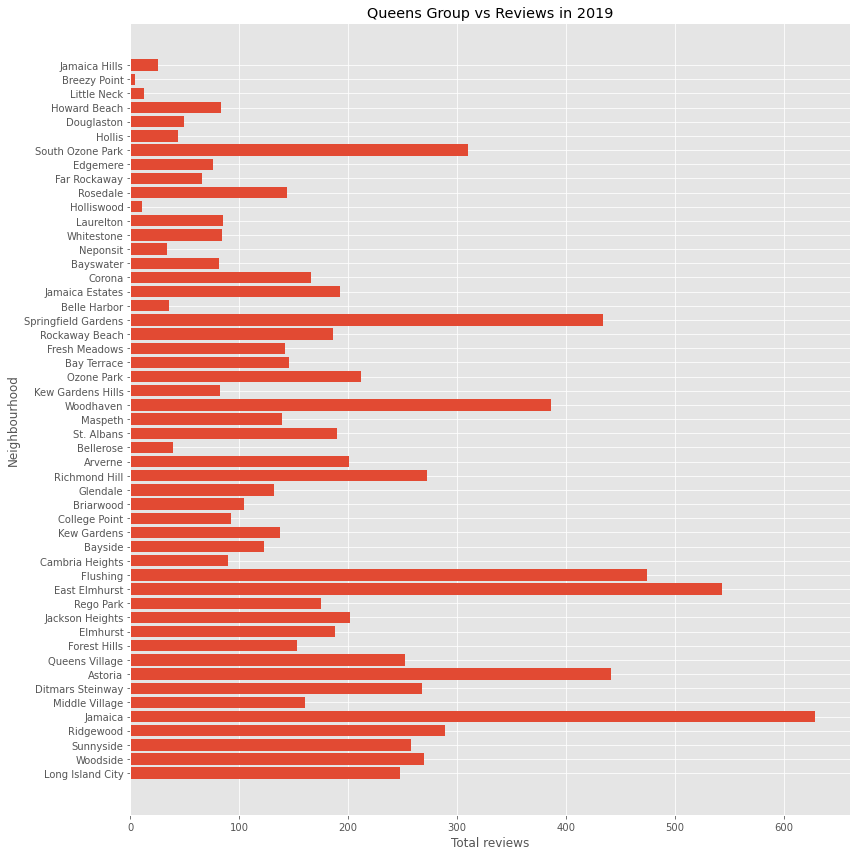

In [37]:
plt.figure(figsize=[12,12])
plt.barh(Queens,reviews_3)

plt.title("Queens Group vs Reviews in 2019")
plt.xlabel("Total reviews")
plt.ylabel("Neighbourhood")

plt.tight_layout()
plt.savefig('bar_Queens.png')
plt.show()

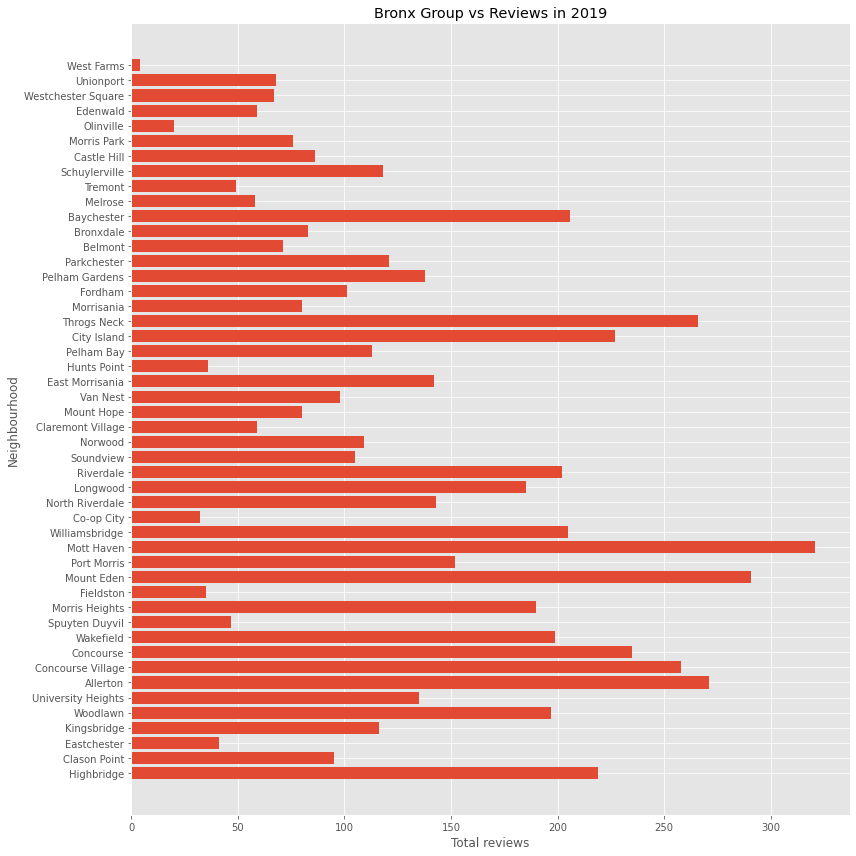

In [38]:
plt.figure(figsize=[12,12])
plt.barh(Bronx,reviews_4)

plt.title("Bronx Group vs Reviews in 2019")
plt.xlabel("Total reviews")
plt.ylabel("Neighbourhood")

plt.tight_layout()
plt.savefig('bar_Bronx.png')
plt.show()

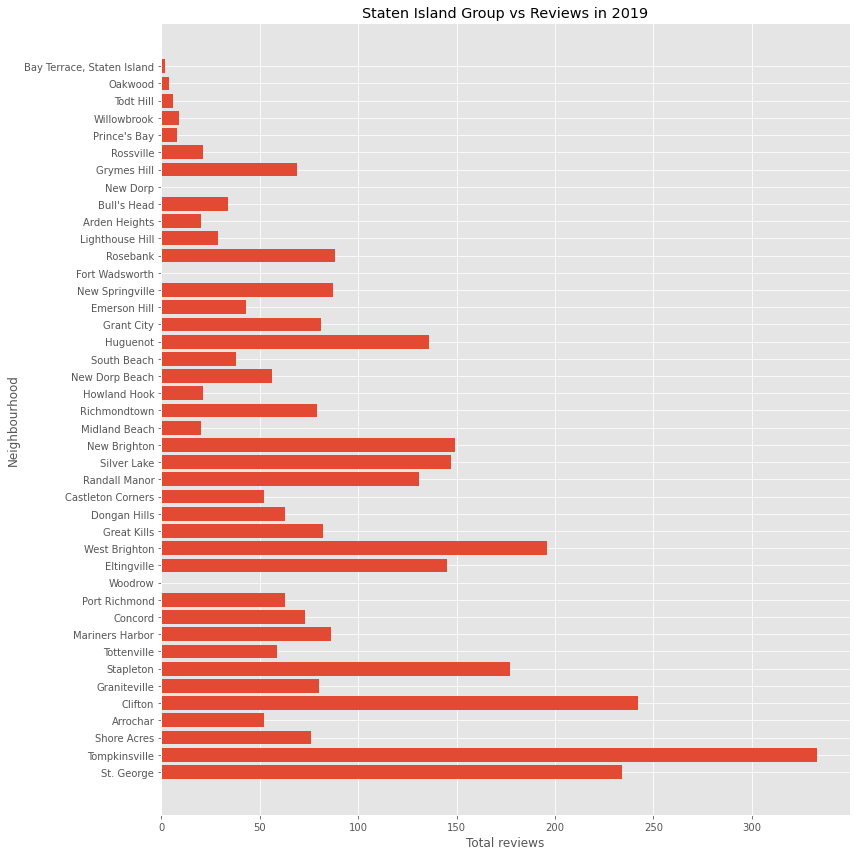

In [39]:
plt.figure(figsize=[12,12])
plt.barh(Staten_Island,reviews_5)

plt.title("Staten Island Group vs Reviews in 2019")
plt.xlabel("Total reviews")
plt.ylabel("Neighbourhood")

plt.tight_layout()
plt.savefig('bar_Staten_Island.png')
plt.show()